# Projet d'Analyse de Données
Ce projet utilise les données d'identification du type de glass ( )
Disponible sur le site UCI au lien : http://archive.ics.uci.edu/ml/datasets/Glass+Identification

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

df = pd.read_csv("glass.data")
df.columns = ["Id",
    "RI: refractive index",
    "Na: Sodium ",
    "Mg: Magnesium",
    "Al: Aluminum",
    "Si: Silicon",
    "K: Potassium",
    "Ca: Calcium",
    "Ba: Barium",
    "Fe: Iron",
    "Glass Type"
             ]
print(df.columns)
print(df.head())
print("Labels existants : "+str(df['Glass Type'].unique()))

Index(['Id', 'RI: refractive index', 'Na: Sodium ', 'Mg: Magnesium',
       'Al: Aluminum', 'Si: Silicon', 'K: Potassium', 'Ca: Calcium',
       'Ba: Barium', 'Fe: Iron', 'Glass Type'],
      dtype='object')
   Id  RI: refractive index  Na: Sodium   Mg: Magnesium  Al: Aluminum  \
0   2               1.51761        13.89           3.60          1.36   
1   3               1.51618        13.53           3.55          1.54   
2   4               1.51766        13.21           3.69          1.29   
3   5               1.51742        13.27           3.62          1.24   
4   6               1.51596        12.79           3.61          1.62   

   Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  Fe: Iron  Glass Type  
0        72.73          0.48         7.83         0.0      0.00           1  
1        72.99          0.39         7.78         0.0      0.00           1  
2        72.61          0.57         8.22         0.0      0.00           1  
3        73.08          0.55         8.07

Séparation des labels et des attributs.

In [2]:
df = df.dropna()
Y = df["Glass Type"]
X = df.drop("Glass Type", 1)
print(X.shape)
print(X.describe())
print(X)
print(Y)

(213, 10)
               Id  RI: refractive index  Na: Sodium   Mg: Magnesium  \
count  213.000000            213.000000   213.000000     213.000000   
mean   108.000000              1.518353    13.406761       2.676056   
std     61.631972              0.003039     0.818371       1.440453   
min      2.000000              1.511150    10.730000       0.000000   
25%     55.000000              1.516520    12.900000       2.090000   
50%    108.000000              1.517680    13.300000       3.480000   
75%    161.000000              1.519150    13.830000       3.600000   
max    214.000000              1.533930    17.380000       3.980000   

       Al: Aluminum  Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  \
count    213.000000   213.000000    213.000000   213.000000  213.000000   
mean       1.446526    72.655023      0.499108     8.957934    0.175869   
std        0.499882     0.774052      0.653035     1.426435    0.498245   
min        0.290000    69.810000      0.000000    

In [3]:
# Pas besoin de factoriser car les données sont déja numériques
# remplacer les valeurs nulls par les plus frequentes
data_cat_encoded = pd.DataFrame(X)
data_cat_encoded.info()
imputer = SimpleImputer(missing_values= -1, strategy="most_frequent")

# remplacer dans le dataset
data_cat_enc = imputer.fit_transform(data_cat_encoded)

#nombre d'observations
n = data_cat_enc.shape[0]
#nombre de variables
p = data_cat_enc.shape[1]

scaler = StandardScaler()
scaler.fit(data_cat_enc)
scaled_data = scaler.transform(data_cat_enc)
print(scaled_data)

pca = PCA(n_components=10)
pca.fit(scaled_data )
results = pca.fit_transform(scaled_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    213 non-null    int64  
 1   RI: refractive index  213 non-null    float64
 2   Na: Sodium            213 non-null    float64
 3   Mg: Magnesium         213 non-null    float64
 4   Al: Aluminum          213 non-null    float64
 5   Si: Silicon           213 non-null    float64
 6   K: Potassium          213 non-null    float64
 7   Ca: Calcium           213 non-null    float64
 8   Ba: Barium            213 non-null    float64
 9   Fe: Iron              213 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 18.3 KB
[[-1.72393811 -0.2451006   0.59188032 ... -0.79259935 -0.35380764
  -0.58830108]
 [-1.70767455 -0.71682556  0.15094587 ... -0.82773435 -0.35380764
  -0.58830108]
 [-1.69141098 -0.22860672 -0.24099586 ... -0.51854637 -0.35380764
  -0

Individus
result : [-0.7533374  -1.33660447 -0.53157003  0.89423028 -0.29232208  0.4278437
  0.01070964 -1.07188645 -0.28599182 -0.00390574]


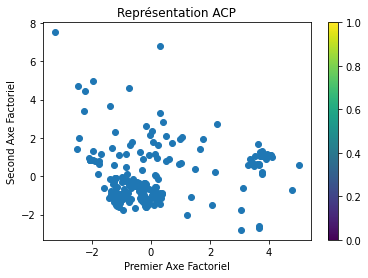

In [4]:
print("Individus")
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1])
print("result : "+str(results[0]))
ax.set_title('Représentation ACP')
ax.set_xlabel('Premier Axe Factoriel')
ax.set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)


On observe les individus se regrouper dans deux zones ou la densité est bien supérieure, cependant il reste quelques individus éparpillés tout autour.

# Variables ACP

------------- Valeurs propres --------- 

[2.83102216e+00 2.34070235e+00 1.41475320e+00 1.16624640e+00
 9.20140310e-01 5.89430670e-01 3.70847037e-01 3.48247726e-01
 6.41696032e-02 1.61036151e-03] 

-------------- Valeurs propres corrigés----------- 

[2.81773097e+00 2.32971314e+00 1.40811116e+00 1.16077107e+00
 9.15820402e-01 5.86663390e-01 3.69105971e-01 3.46612760e-01
 6.38683374e-02 1.60280113e-03]


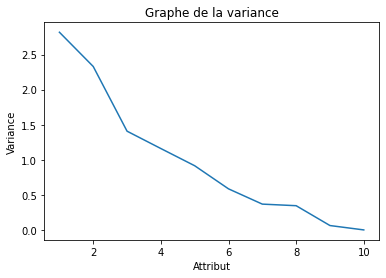

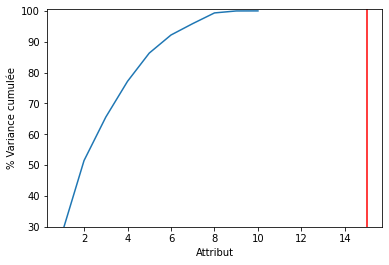

In [5]:
 # plot the explained variance of each component

cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
# Valeurs propres
print("------------- Valeurs propres --------- \n")
print(pca.explained_variance_,"\n")

corrected_variance = ((n-1)/n)*pca.explained_variance_
print("-------------- Valeurs propres corrigés----------- \n")
print(corrected_variance)


# Graphe de la variance de chaque attribut
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Graphe de la variance")
plt.ylabel("Variance")
plt.xlabel("Attribut")
plt.show()



plt.ylabel('% Variance cumulée')
plt.xlabel('Attribut')
plt.axvline(x=15,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

Covariance


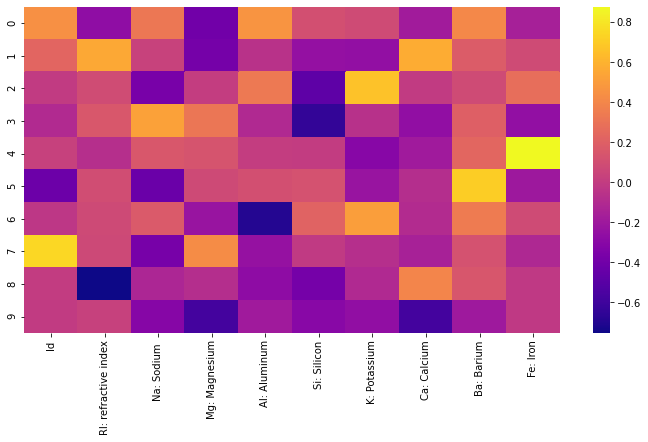

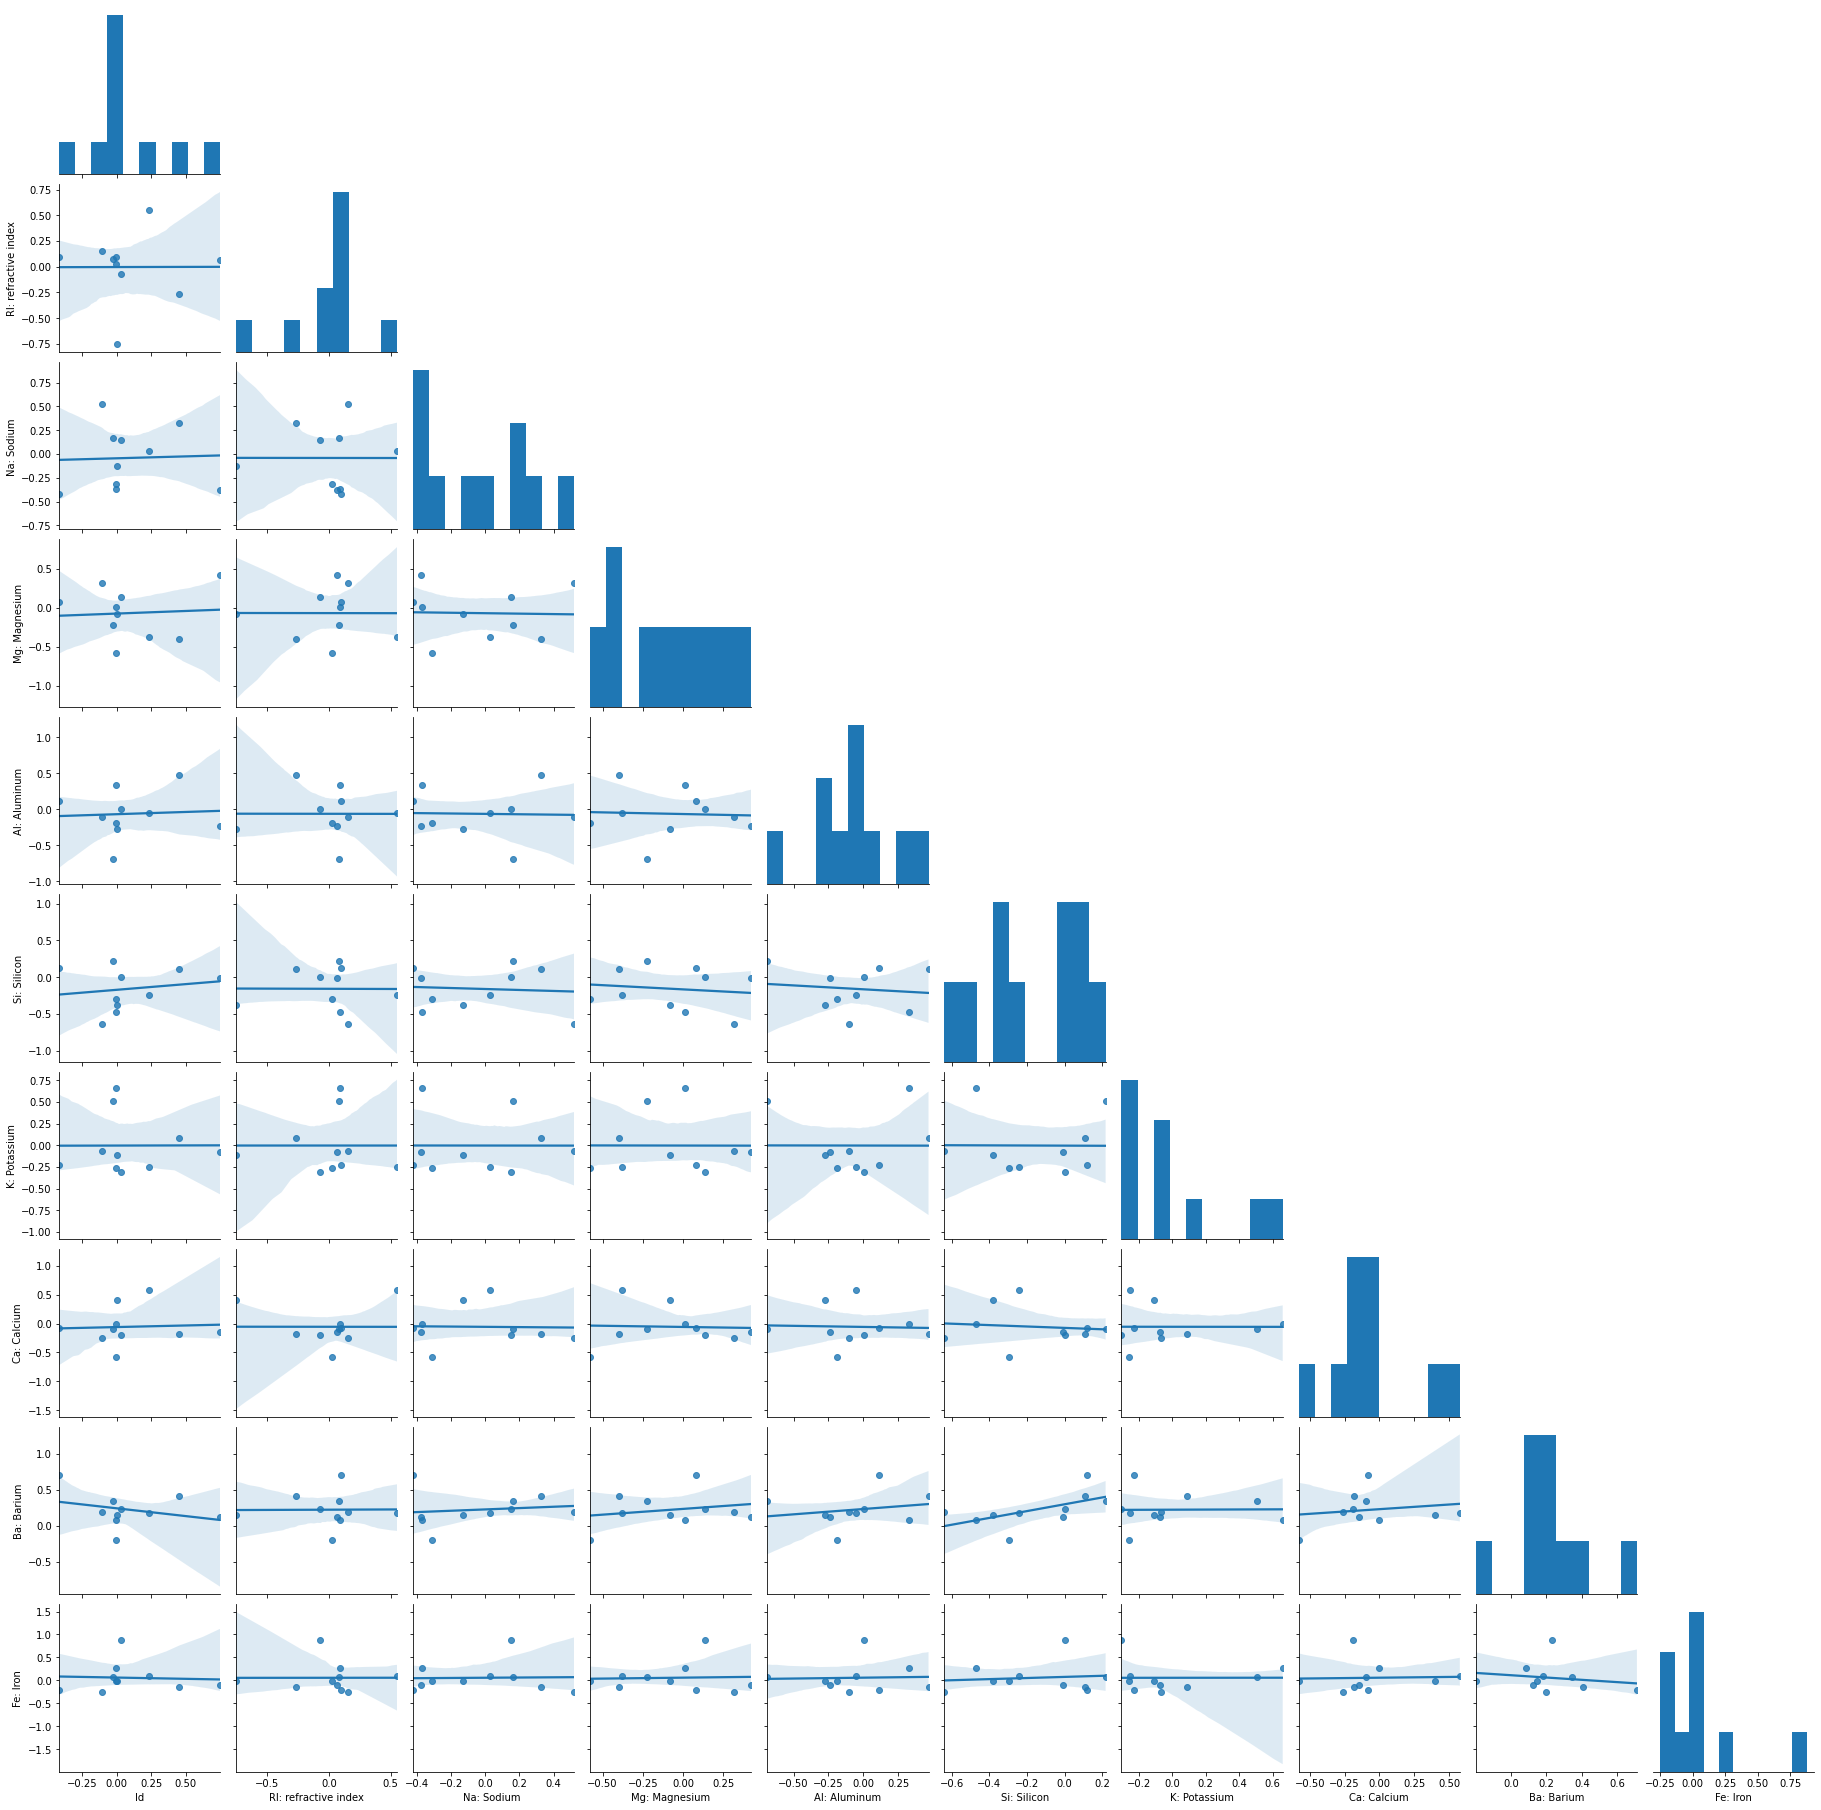

In [6]:
# Plot the correlation circle
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
print("Covariance")
sns.heatmap(df_comp,cmap='plasma',)
sns.pairplot(df_comp, kind="reg", palette="husl", corner=True)
# Calcul de correlation des variables  
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


Il y'a quelques variables ayant de fortes corrélation commme le Silicon et l'Aluminium ou encore le Potassium et et le Barium

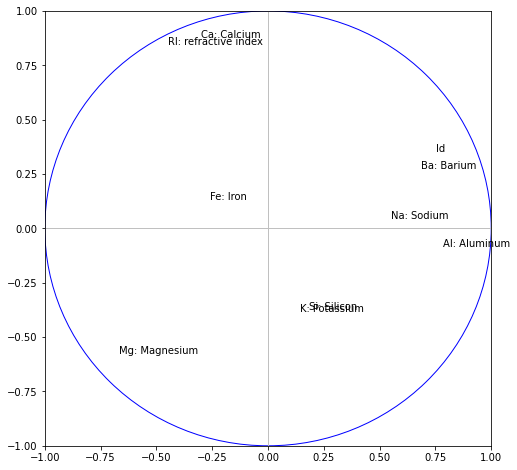

In [7]:
for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

On remarque dans ce cercle que les attributs les plus liés sont Calcium/Refractive Index ainsi que Potasium/Silicon le  reste des éléments sont éparpillés  tout autour de manière distante.
De plus les individus étant assez eloignés des axes on peut en déduire que ces axes représentent bien les attributs.

# Clustering sur données initiales

Meilleur nombre de clusters : 4


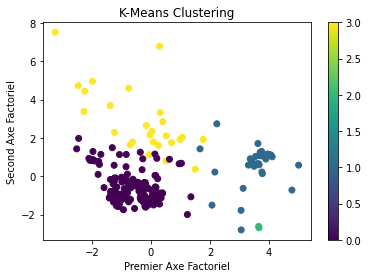

In [8]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(3,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_data, preds)
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score

print("Meilleur nombre de clusters : "+str(best_number))
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


best_number_normal = best_number
best_preds_normal = best_preds
best_score_normal = best_score

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Premier Axe Factoriel')
ax.set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)

Le meilleur nombre de clusters définis par la méthode silouhette est de 4 ce qui n'est pas equivalent au nombre de classes présents initialient qui était de 7.


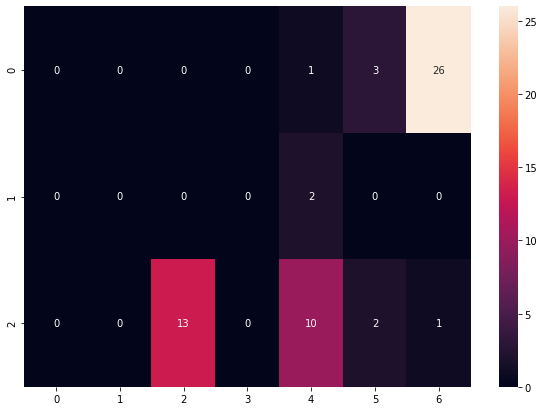

In [9]:
array = confusion_matrix(best_preds, Y)[1:best_number]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

On observe dans cette matrice de confusion ( là ou chaque colonne est une des classes initiales et chaque ligne un des clusters ) que la majorité des individus d'une même classe sont souvent regroupés ensemble mise à part pour 2 classes qui sont  plus distribués ( une avec 56/20/0 et une autre avec 8/2/3 ) 

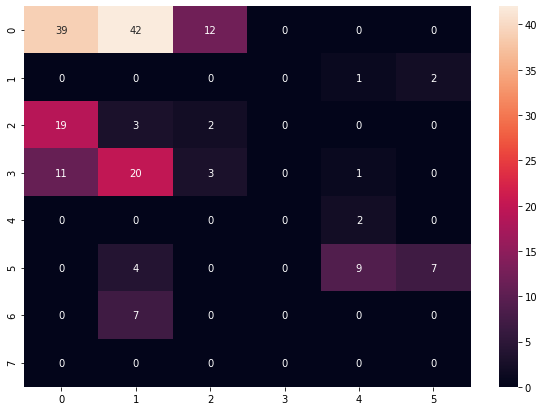

In [10]:
clusterer = KMeans(n_clusters=7)
preds = clusterer.fit_predict(scaled_data)

array = confusion_matrix(preds, Y)[:,1:7]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Même en fixant un nombre de clusters égale au nombre de classe certaines classes se retrouvent mélangés ( comment onn peut le remarquer pour les cas de 39, 42 et 12 de 3 classes différentes mais pourtant dans le même cluster ) 
On peut donc considérer que ce clustering ne reproduit pas de  manière equivalente les classes initiales.

# Clustering sur PCA

In [11]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(3,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(results[:,:1])
    centers = clusterer.cluster_centers_

    score = silhouette_score(results, preds)
    print("Pour {} clusters le score silhouette = {}".format(n_clusters, score))
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score
        
print("Meilleur nombre de clusters sur PCA : "+str(best_number))

Pour 3 clusters le score silhouette = 0.1348072385105943
Pour 4 clusters le score silhouette = 0.11570650805453175
Pour 5 clusters le score silhouette = 0.10957340908126097
Pour 6 clusters le score silhouette = 0.055827094264041116
Pour 7 clusters le score silhouette = 0.036869500203587965
Pour 8 clusters le score silhouette = 0.044540887602858806
Meilleur nombre de clusters sur PCA : 3


[[-7.53337402e-01 -1.33660447e+00 -5.31570029e-01 ... -1.07188645e+00
  -2.85991818e-01 -3.90574111e-03]
 [-5.51352352e-01 -1.68189878e+00 -5.41976706e-01 ... -1.01531241e+00
  -9.74347953e-02  2.83768317e-02]
 [-1.16146804e+00 -1.19978787e+00 -1.04497068e-01 ... -7.23624492e-01
  -4.80280513e-03  9.75501612e-02]
 ...
 [ 3.62302794e+00  1.70722317e+00 -9.05643464e-01 ...  3.47864589e-01
  -8.90135407e-01  4.53878869e-02]
 [ 3.89063814e+00  8.96342048e-01 -1.21958354e+00 ...  2.70794626e-01
   7.60050910e-02 -2.84718470e-02]
 [ 3.94590237e+00  1.16072385e+00 -8.71160964e-01 ...  3.11713472e-01
   6.44068109e-02 -2.05272906e-02]]


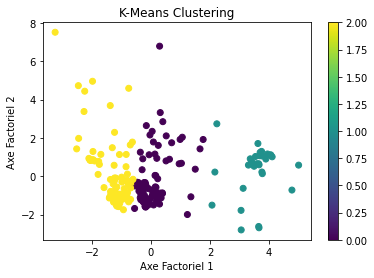

In [12]:
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))
print(results)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Axe Factoriel 1')
ax.set_ylabel('Axe Factoriel 2')
plt.colorbar(scatter)

On remarque que le meilleur nombre de clusters trouvés sur les données résultantes de la réduction de dimension est  de 3 clusters et lorsque l'on visualise les données on se rend compte que les distributions sont  différentes des invidivus entre les 2 clusterings.

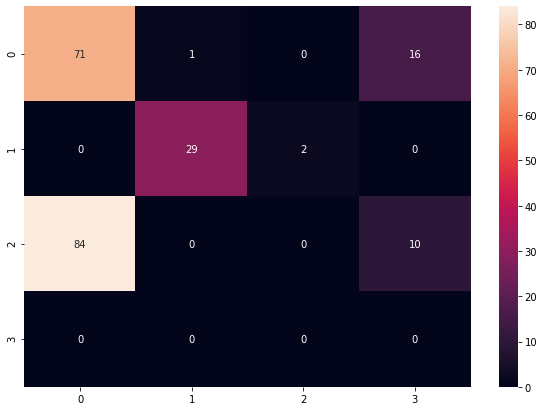

In [13]:
array = confusion_matrix(best_preds, best_preds_normal) 
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

En appliquant le calcul de matrice de confusion entre le clustering pré-ACP et celui post-ACP on remarque aussi une grande différence particulièrement pour le cluster 2 constitué dans le clustering post-ACP de 157 individus et qui sont sont répartis en 84 et 73 sur deux clusters différents dans celui pré-ACP.

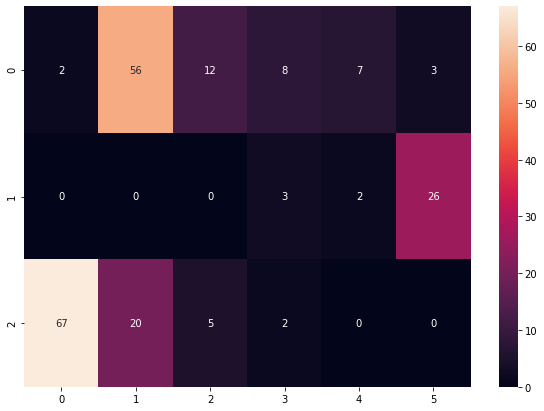

In [14]:
array = confusion_matrix(best_preds, Y)[:best_number,1:8]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Dans cette matrice de confusion on voit une assez bonne concentration des individus d'une même classe dans un même cluster tout comme le clustering sur les données pré-ACP

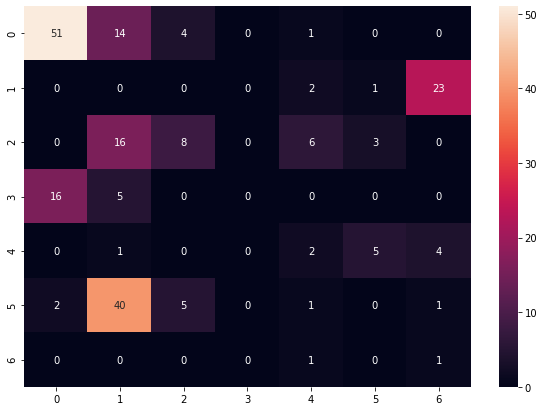

In [15]:
clusterer = KMeans(n_clusters=7)
preds = clusterer.fit_predict(results[:,:1])
array = confusion_matrix(preds, Y)[:7,1:8]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Ici contrairement au cas pré-ACP les individus de chaque classe sont bien mieux répartis et sur une plus grande variété de clusters.

# LDA

X shape : (213, 10)
Y shape : (213,)
Y unique : [1 2 3 5 6 7]
Pré-LDA


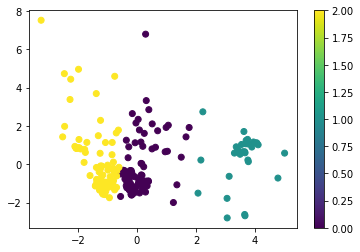

No handles with labels found to put in legend.


LDA


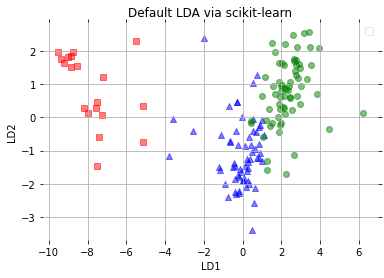

Explained Variance Ratio : [0.92152138 0.07847862]


In [16]:

print("X shape : "+str(scaled_data.shape))
print("Y shape : "+str(Y.shape))
print("Y unique : "+str(Y.unique()))
X_train, X_test, y_train, y_test = train_test_split(scaled_data , best_preds, test_size=0.30,random_state=42,shuffle=True)


Counter(y_train)
Counter(y_test)


lda = LDA(n_components=2)
X_lda_sklearn = lda.fit_transform(X_train, y_train)

def plot_scikit_lda(X_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_train[:,0][y_train == label],
                    y=X_train[:,1][y_train == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                  #  label=label_dict[label]
                   )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

    
print("Pré-LDA")
plt.scatter(results[:,0],results[:,1],  c=best_preds)
plt.colorbar(scatter)
plt.show()

print("LDA")
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')
print("Explained Variance Ratio : "+str(lda.explained_variance_ratio_))

Après application de LDA sur les données avec le clustering crée précedemment on observe que la séparation entre les ensembles n'est pas forcément meilleure que ce qu'elle était avant. Afin d'observer plus de possibilités je vais appliquer LDA en utilisant les classes du jeu de données originel.

Pré-LDA


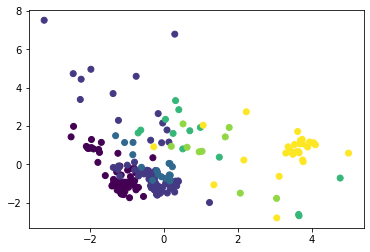

LDA
Explained Variance Ratio : [0.8368771  0.11135735]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data , Y.values, test_size=0.30,random_state=42,shuffle=True)
lda = LDA(n_components=2)
Xlda = lda.fit_transform(X_train, y_train)

def plot_scikit_lda(X_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(7),('o', 'o', 'o','o','o','o','o'),('blue', 'red', 'green', 'yellow', 'brown', 'orange', 'purple')):

        plt.scatter(x=X_train[:,0][y_train == label],
                    y=X_train[:,1][y_train == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                   # label=label_dict[label]
                   )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

print("Pré-LDA")
plt.scatter(results[:,0],results[:,1],  c=Y.values)
plt.show()
print("LDA")
#plot_scikit_lda(X_lda_sklearn, title='LDA')
print("Explained Variance Ratio : "+str(lda.explained_variance_ratio_))

Accuracy of : 90.625
Explained Variance Ratio : [0.8368771  0.11135735]


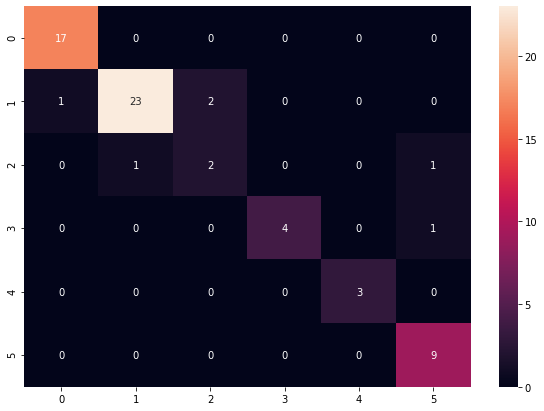

In [18]:
results = lda.predict(X_test)
array = confusion_matrix(results, y_test)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
n_test=X_test.shape[0]
print("Accuracy of : "+str(np.trace(array)/n_test*100))
print("Explained Variance Ratio : "+str(lda.explained_variance_ratio_))

Dans ce cas on remarque que la séparation crée par LDA est bien plus prononcée et nette, de plus la matrice de confusion, l'accuracy ainsi que la variance expliquée indique des scores plutôt corrects.

# Partie 2
Afin de mieux tester la méthode LDA j'ai continuer mes expérimentations sur un autre jeu de données ( disponible ici http://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29) et concernant des parties de jeu d'echec.

In [19]:
df = pd.read_csv("kr-vs-kp.data")
print(df.columns)

Index(['f', 'f.1', 'f.2', 'f.3', 'f.4', 'f.5', 'f.6', 'f.7', 'f.8', 'f.9',
       'f.10', 'f.11', 'l', 'f.12', 'n', 'f.13', 'f.14', 't', 'f.15', 'f.16',
       'f.17', 'f.18', 'f.19', 'f.20', 'f.21', 't.1', 'f.22', 'f.23', 'f.24',
       'f.25', 'f.26', 'f.27', 'f.28', 't.2', 't.3', 'n.1', 'won'],
      dtype='object')


In [20]:
df = df.dropna()
Y = pd.factorize(df["won"])
X = df.drop("won", 1)
print(X.describe())

           f   f.1   f.2   f.3   f.4   f.5   f.6   f.7   f.8   f.9  ...  f.22  \
count   3195  3195  3195  3195  3195  3195  3195  3195  3195  3195  ...  3195   
unique     2     2     2     2     2     2     2     2     2     2  ...     2   
top        f     f     f     f     f     f     f     f     f     f  ...     f   
freq    2838  2970  3075  2873  2128  1721  2025  2499  1979  2224  ...  3020   

        f.23  f.24  f.25  f.26  f.27  f.28   t.2   t.3   n.1  
count   3195  3195  3195  3195  3195  3195  3195  3195  3195  
unique     2     2     2     2     2     2     2     2     2  
top        f     f     f     f     f     f     t     t     n  
freq    3194  3148  3059  2630  3020  1983  2006  2344  2406  

[4 rows x 36 columns]


In [21]:
# factorisation
data_cat_encoded = []
data_categories = []
for x in X:
    data_cat_encod, data_categ = pd.factorize(X[x])
    data_cat_encoded.append(data_cat_encod)
    data_categories.append(data_categ)

# remplacer les valeurs nulls par les plus frequentes
data_cat_encoded = pd.DataFrame(np.transpose(data_cat_encoded))
data_cat_encoded.info()
imputer = SimpleImputer(missing_values= -1, strategy="most_frequent")

# remplacer dans le dataset
data_cat_enc = imputer.fit_transform(data_cat_encoded)




#nombre d'observations
n = data_cat_enc.shape[0]
#nombre de variables
p = data_cat_enc.shape[1]

scaler = StandardScaler()
scaler.fit(data_cat_enc)
scaled_data = scaler.transform(data_cat_enc)


pca = PCA(n_components=36)
pca.fit(scaled_data )
results = pca.fit_transform(scaled_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3195 non-null   int64
 1   1       3195 non-null   int64
 2   2       3195 non-null   int64
 3   3       3195 non-null   int64
 4   4       3195 non-null   int64
 5   5       3195 non-null   int64
 6   6       3195 non-null   int64
 7   7       3195 non-null   int64
 8   8       3195 non-null   int64
 9   9       3195 non-null   int64
 10  10      3195 non-null   int64
 11  11      3195 non-null   int64
 12  12      3195 non-null   int64
 13  13      3195 non-null   int64
 14  14      3195 non-null   int64
 15  15      3195 non-null   int64
 16  16      3195 non-null   int64
 17  17      3195 non-null   int64
 18  18      3195 non-null   int64
 19  19      3195 non-null   int64
 20  20      3195 non-null   int64
 21  21      3195 non-null   int64
 22  22      3195 non-null   int64
 23  23      3195 

Individus


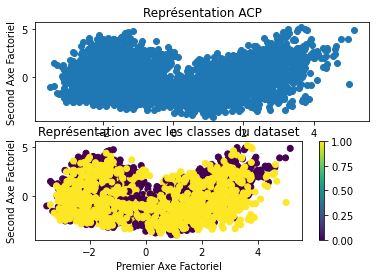

In [22]:
print("Individus")
fig, ax = plt.subplots(2)

scatter = ax[0].scatter(results[:,0],results[:,1])
ax[0].set_title('Représentation ACP')
ax[0].set_xlabel('Premier Axe Factoriel')
ax[0].set_ylabel('Second Axe Factoriel')

scatter2 = ax[1].scatter(results[:,0],results[:,1], c=Y[0])
ax[1].set_title('Représentation avec les classes du dataset')
ax[1].set_xlabel('Premier Axe Factoriel')
ax[1].set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)


Ici les individus sont plus regroupés en une seule grande zone centrale plutôt que divisés.

------------- Valeurs propres --------- 

[3.60741493 2.84750834 2.59788689 1.90483938 1.85551538 1.51898141
 1.39057929 1.38513557 1.32719319 1.26273014 1.14010055 1.09077694
 0.99848168 0.97109784 0.949835   0.92569077 0.85186263 0.79271549
 0.76382397 0.72499179 0.70196325 0.66474925 0.6037503  0.56560959
 0.53877853 0.53024123 0.51567018 0.49016339 0.45655987 0.42648091
 0.40806158 0.3924072  0.32530777 0.28393415 0.15002641 0.05040634] 

-------------- Valeurs propres corrigés----------- 

[3.60628585 2.8466171  2.59707378 1.90424318 1.85493462 1.51850598
 1.39014406 1.38470204 1.32677779 1.26233492 1.13974371 1.09043554
 0.99816917 0.9707939  0.94953772 0.92540104 0.85159601 0.79246738
 0.7635849  0.72476488 0.70174354 0.66454119 0.60356133 0.56543256
 0.5386099  0.53007527 0.51550878 0.49000998 0.45641697 0.42634742
 0.40793386 0.39228438 0.32520595 0.28384528 0.14997946 0.05039057]


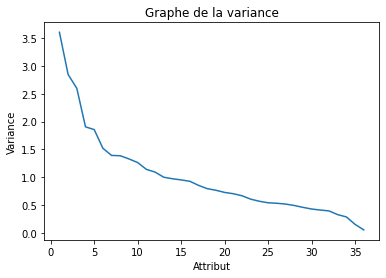

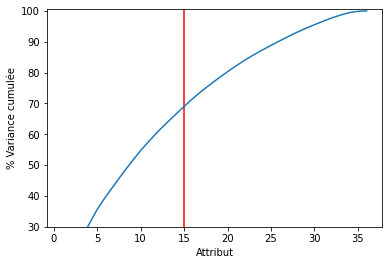

In [23]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
# Valeurs propres
print("------------- Valeurs propres --------- \n")
print(pca.explained_variance_,"\n")

corrected_variance = ((n-1)/n)*pca.explained_variance_
print("-------------- Valeurs propres corrigés----------- \n")
print(corrected_variance)


# Graphe de la variance de chaque attribut
plt.plot(np.arange(1,p+1),corrected_variance)
plt.title("Graphe de la variance")
plt.ylabel("Variance")
plt.xlabel("Attribut")
plt.show()



plt.ylabel('% Variance cumulée')
plt.xlabel('Attribut')
plt.axvline(x=15,color='red')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)

Covariance
Cercle de correlations entre les attributs


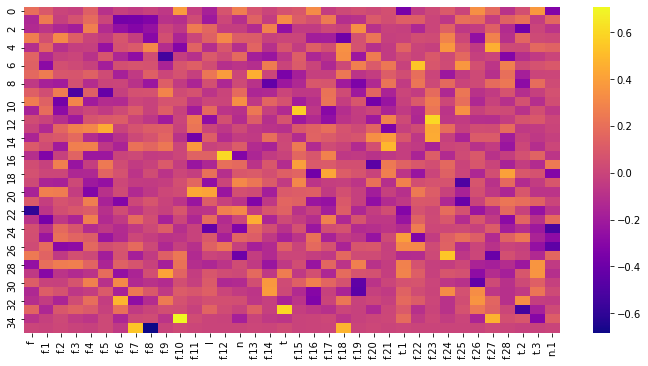

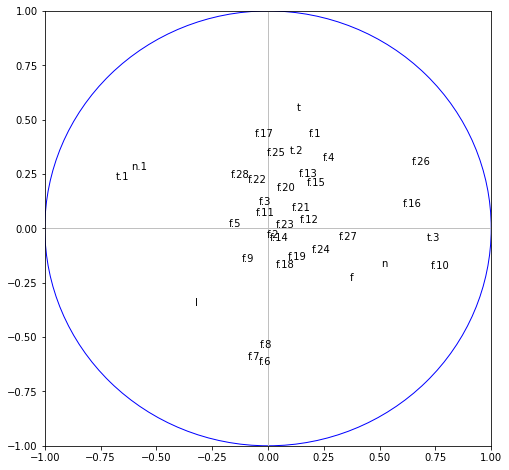

In [24]:
# Cercle de correlation
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
print("Covariance")
sns.heatmap(df_comp,cmap='plasma',)
# Calcul de correlation des variables  
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))


for k in range(p):
  corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
print("Cercle de correlations entre les attributs")
plt.show()

Ici les attributs sont bien plus liés les uns entre les autres mais surtout ce que l'on peut remarquer c'est qu'ils se rapprochent plutôt assez du centre du cercle ce qui est interprétable par le fait que ces deux axes sont mal représentatifs pour les attributs.

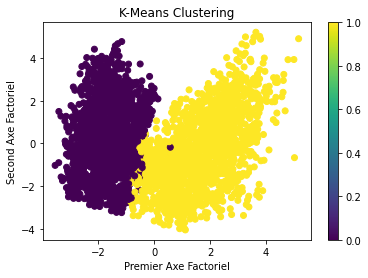

In [25]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_cat_enc)
    centers = clusterer.cluster_centers_
    score = silhouette_score(data_cat_enc, preds)
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score
        
# Calcul de correlation des variables  
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Premier Axe Factoriel')
ax.set_ylabel('Second Axe Factoriel')
plt.colorbar(scatter)


Ici on peut remarquer que le nombre de clusters choisis automatiquement est equivalent au nombre de labels initials du dataset.

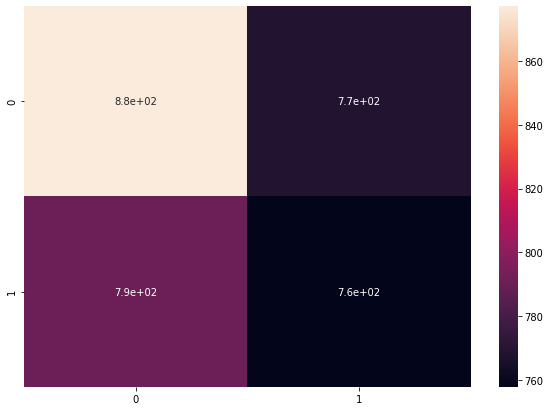

In [26]:
array = confusion_matrix(best_preds, Y[0])
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Cependant avec cette confusion matrix on voit très  bien que les données sont répartis de manière égale entre les différents clusters quelque soit la classe initiale. Donc même si le nombre de clusters est le bon, ses individus sont mélangés ( donc mauvais ) .

In [27]:
best_score = 0
best_preds = 0
best_number = 0
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(results[:,:1])
    centers = clusterer.cluster_centers_

    score = silhouette_score(results, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    if score>best_score:
        best_number = n_clusters
        best_preds = preds
        best_score = score

For n_clusters = 2, silhouette score is 0.107118631054292)
For n_clusters = 3, silhouette score is 0.04528155169916871)
For n_clusters = 4, silhouette score is 0.015407074332817598)
For n_clusters = 5, silhouette score is 0.0095504059230876)
For n_clusters = 6, silhouette score is -0.001166270119875536)
For n_clusters = 7, silhouette score is -0.002313090120423499)
For n_clusters = 8, silhouette score is -0.008375708144064159)
For n_clusters = 9, silhouette score is -0.01145719714328942)


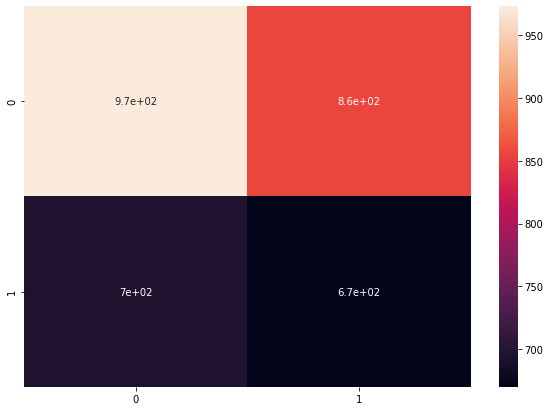

In [28]:
array = confusion_matrix(best_preds, Y[0])
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

Après application de PCA le Clustering donne des résultats assez similaire et aucune amélioration au niveau de la distribution des individus de chaque classe.

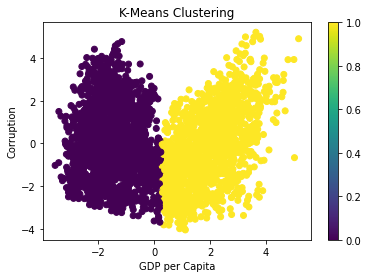

In [29]:
# Calcul de correlation des variables  
corrected_variance = ((n-1)/n)*pca.explained_variance_
sqrt_cor_var = np.sqrt(corrected_variance) # ecart type
corvar = np.zeros((p,p))

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(results[:,0],results[:,1],  c=best_preds)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

<>:19: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:19: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:458: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(36, 2 - 1) = 1 components.
  warnings.warn(
/usr/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
<ipython-input-30-29e59cfa9c46>:19: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  y=1[y_train == label],


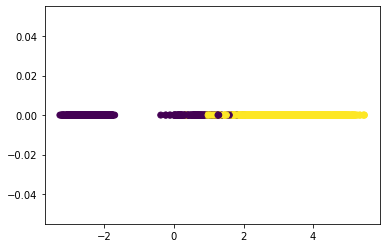

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data , best_preds, test_size=0.30,random_state=42,shuffle=True)


from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda_sklearn = lda.fit_transform(X_train, y_train)

def plot_scikit_lda(X_train, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_train[:,0][y_train == label],
                    #y=X_train[:,1][y_train == label] * -1, # flip the figure
                    y=1[y_train == label],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

    
val = 0
ar = np.arange(len(X_lda_sklearn[:,0])) # just as an example array
plt.scatter(X_lda_sklearn[:,0], np.zeros_like(ar) + val, c=y_train)
plt.show()



La méthode LDA générant un nombre de dimension égale au nombre de classes initiales -1, j'obtiens donc une dimensionalité de 1 que je viens de plot et qui permet de visualiser une séparation entre les classes pas forcément meilleure qu'initialement.

Accuracy of : 95.9332638164755
Explained Variance Ratio : [0.99999858]


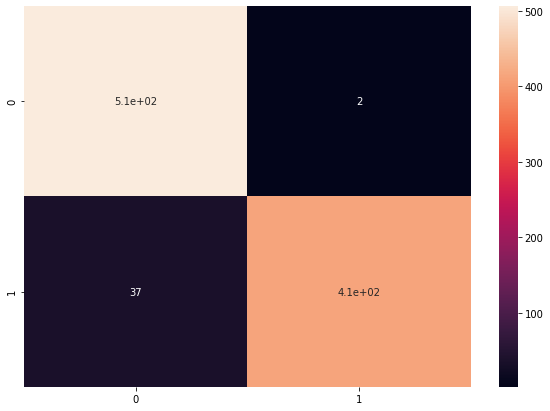

In [31]:
results = lda.predict(X_test)
array = confusion_matrix(results, y_test)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
n_test=X_test.shape[0]
print("Accuracy of : "+str(np.trace(array)/n_test*100))
print("Explained Variance Ratio : "+str(lda.explained_variance_ratio_))

Cependant après application sur les données de test et le calcul de la matrice de confusion et d'un test d'accuracy on remarque d'excellents résultats et donc une bonne utilité de LDA ici bien meilleure que sur le premier jeu de données.